# VAD Analysis on sentences of the dataset

### Import libraries and files

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import statsmodels.api as sm
import sklearn as sk

# some_file.py
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '../')
import read_matlab_files as rf


### Take data from CSV files

In [2]:
vad_arousal = pd.read_csv(r'../Lexicons/NRC_VAD_Lexicon/NRC-VAD-Lexicon-a-scores.csv')
vad_valence = pd.read_csv(r'../Lexicons/NRC_VAD_Lexicon/NRC-VAD-Lexicon-v-scores.csv')
vad_dominance = pd.read_csv(r'../Lexicons/NRC_VAD_Lexicon/NRC-VAD-Lexicon-d-scores.csv')
zuco_cs = pd.read_csv(r'../Lexicons/ZuCo_words_dataset.csv')
#zuco_cs = zuco_cs.drop(index=430)


### Take sentences from the dataset

In [3]:
%%time
sentences_list = rf.getSentencesMeanValues()


c:\users\fra\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
c:\users\fra\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Wall time: 9min 35s


In [4]:
def takeVADforSentences(vad_arousal, vad_valence, vad_dominance, sentence):
    tempA = 0
    tempV = 0
    tempD = 0
    for word in sentence:
        vad_arousal_temp = vad_arousal.loc[vad_arousal['Word']==word]
        if not vad_arousal_temp.empty:   
            tempA+=(vad_arousal_temp.iloc[:,1].values[0])
            tempV+=(vad_valence.loc[vad_valence['Word']==word].iloc[:,1].values[0])
            tempD+=(vad_dominance.loc[vad_valence['Word']==word].iloc[:,1].values[0])
            #break
    if tempA != 0 and tempV != 0 and tempD != 0:
        #a_value = np.average(tempA)
        #v_value = np.average(tempV)
        #d_value = np.average(tempD)
        #return a_value, v_value, d_value
        return tempA, tempV, tempD
    else:
        return -100, -100, -100
    


In [5]:
def createCsvWithVAD(ar_list, va_list, do_list):
    df = pd.DataFrame(columns=['IdSent', 'Arousal', 'Valence', 'Dominance'])
   
    for x in range(len(ar_list)):
        ar = ar_list[x]
        va = va_list[x]
        do = do_list[x]
        df.loc[len(df.index)] = [x, ar, va, do]
    
    #scaler = MinMaxScaler()
    #df_norm = pd.DataFrame(scaler.fit_transform(df.iloc[:,1:].values), columns=df.columns[1:])
    print(df)
    return df


def createCsvWithValueForWords(mps_list, trt_list, gd_list, ffd_list):
    df = pd.DataFrame(columns=['MPS', 'TRT', 'GD', 'FFD'])
    for x in range(len(mps_list)):
            mps = mps_list[x]
            trt = trt_list[x]
            gd = gd_list[x]
            ffd = ffd_list[x]
            df.loc[len(df.index)] = [mps, trt, gd, ffd]
    #scaler = MinMaxScaler()
    #df_norm = pd.DataFrame(scaler.fit_transform(df.iloc[:,:].values), columns=df.columns[:])
    print(df)
    return df


def findGazeValueForWords(sentences_list):
    mps_list = []
    trt_list = []
    gd_list = []
    ffd_list = []

    for x in range(len(sentences_list)):
        mps = []
        trt = 0
        gd = 0
        ffd = 0
        for k in range(len(sentences_list[x])):
            mps.append(sentences_list[x][k]['MPS'])
            trt += sentences_list[x][k]['TRT']
            gd += sentences_list[x][k]['GD']
            ffd += sentences_list[x][k]['FFD']
        mps_value = np.average(mps)
        mps_list.append(mps_value) 
        trt_list.append(trt)
        gd_list.append(gd)
        ffd_list.append(ffd)
        
    return createCsvWithValueForWords(mps_list, trt_list, gd_list, ffd_list)





In [6]:
%%time
ar_list_x = []
va_list_y = []
do_list_z = []

vad_arousal = vad_arousal.sort_values(by=['Word']).reset_index(drop=True)
vad_valence = vad_valence.sort_values(by=['Word']).reset_index(drop=True)
vad_dominance = vad_dominance.sort_values(by=['Word']).reset_index(drop=True)


for x in range(len(sentences_list)):
    sentence = []
    for k in range(len(sentences_list[x])):
        sentence.append(sentences_list[x][k]['Word'][0])
        
    sentence_arousal, sentence_valence, sentence_dominance = takeVADforSentences(vad_arousal, vad_valence, vad_dominance, sentence)
    
    if sentence_arousal!=-100 and sentence_valence!=-100 and sentence_dominance!=-100:
        ar_list_x.append(sentence_arousal)
        va_list_y.append(sentence_valence)
        do_list_z.append(sentence_dominance)

#scaler = MinMaxScaler()

#ar_list_x = scaler.fit_transform(ar_list_x)
#va_list_y = scaler.fit_transform(va_list_y)
#do_list_z = scaler.fit_transform(do_list_z)


Wall time: 18.1 s


In [9]:
sentence_VAD = createCsvWithVAD(ar_list_x, va_list_y, do_list_z)
sentence_VAD.to_csv('../Lexicons/Sentence_VAD_Emotion_dataset.csv', index=False)
sentence_ValuesOfWOrds = findGazeValueForWords(sentences_list)
sentence_ValuesOfWOrds.to_csv('../Lexicons/Sentence_Gaze_Values_Of_Words_dataset.csv', index=False)

     IdSent  Arousal  Valence  Dominance
0       0.0    4.263    3.370      4.482
1       1.0    1.803    1.289      1.559
2       2.0    2.943    4.183      4.411
3       3.0    2.926    5.142      4.441
4       4.0    4.355    5.174      5.209
..      ...      ...      ...        ...
385   385.0    1.517    2.538      2.470
386   386.0    4.818    8.149      7.238
387   387.0    3.395    3.326      4.804
388   388.0    1.070    2.309      1.683
389   389.0    5.507    7.575      6.609

[390 rows x 4 columns]
             MPS          TRT           GD          FFD
0    3393.726335  3272.114127  2271.848639  2042.908123
1    3541.701698  2037.391503  1254.270915  1211.811111
2    3393.698266  4614.541475  3705.400705  3282.506023
3            NaN          NaN          NaN          NaN
4    3361.964108  3248.623581  2384.391665  2072.423616
..           ...          ...          ...          ...
385          NaN          NaN          NaN          NaN
386  3244.692796  2786.358364  2406.

## Analysis of VAD for each sentence

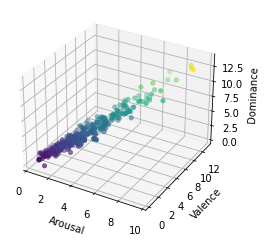

In [10]:
vad_sentences_cs = pd.read_csv(r'../Lexicons/Sentence_VAD_Emotion_dataset.csv')
vad_cs = pd.DataFrame(vad_sentences_cs, columns=['Arousal','Valence','Dominance'])
x = vad_cs['Arousal']
y = vad_cs['Valence']
z = vad_cs['Dominance']

ax = plt.axes(projection='3d')
ax.scatter(x, y, z, c=z, cmap='viridis', linewidth=0.5);
ax.set_xlabel('Arousal')
ax.set_ylabel('Valence')
ax.set_zlabel('Dominance');